### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data
from simple_trade import premade_backtest

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# --- Global Parameters ---
global_parameters = {
    'initial_cash': 10000,
    'commission_long': 0.001,
    'commission_short': 0.001,
    'short_borrow_fee_inc_rate': 0.0,
    'long_borrow_fee_inc_rate': 0.0,
    'trading_type': 'long',
    'day1_position': 'none',
    'risk_free_rate': 0.0,
}

In [3]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'

data = download_data(symbol, start_date, end_date, interval=interval)

### Backtest with CCI

Computing CCI...


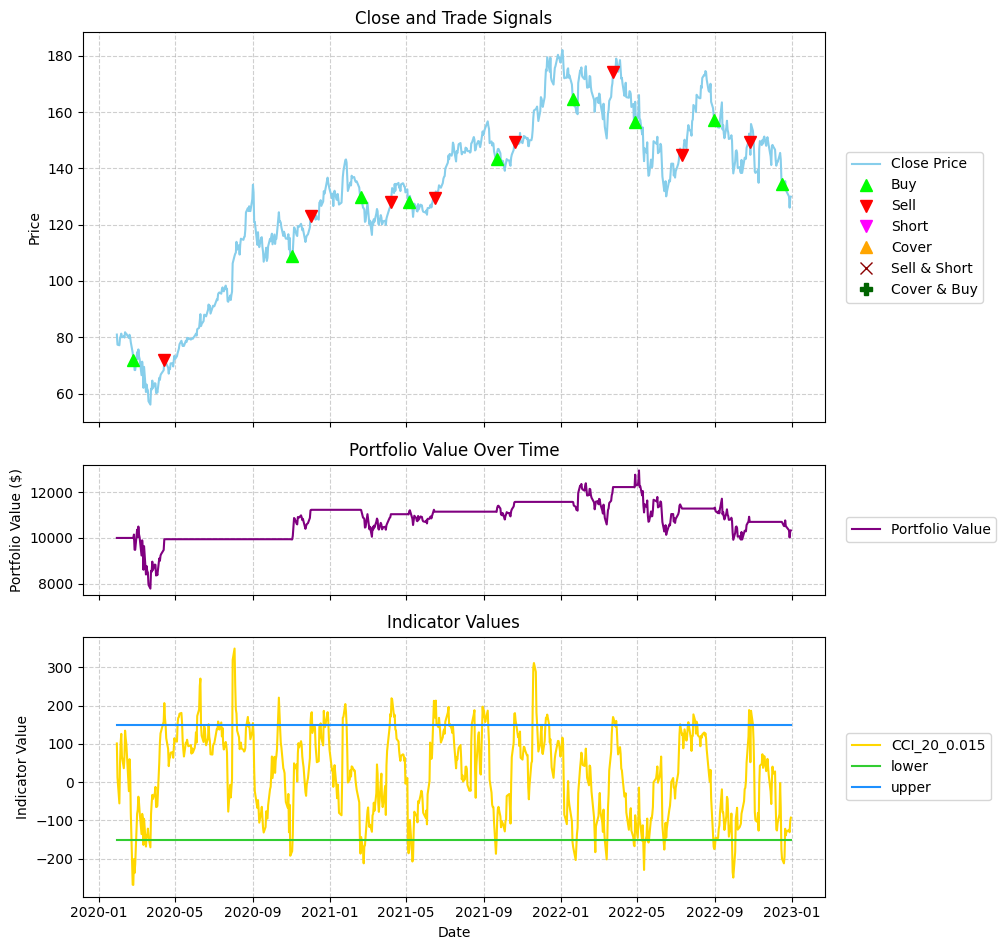

In [4]:
# --- Strategy Parameters ---
strategy_name = 'cci'
specific_parameters = {
    'window': 20,
    'constant': 0.015,
    'upper': 150,
    'lower': -150,
    'fig_control': 1,
}

parameters = {**global_parameters, **specific_parameters}

results, portfolio, fig = premade_backtest(data, strategy_name, parameters)

### Backtest with MACD

Computing MACD...


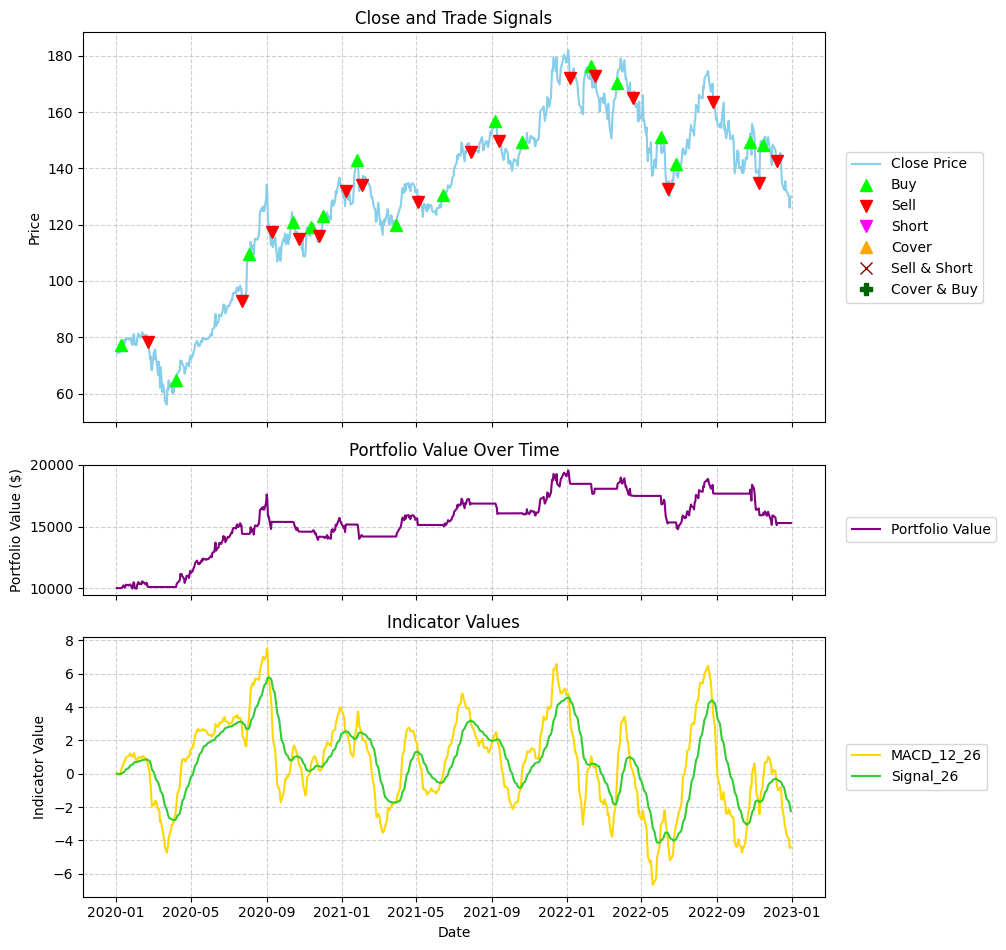

In [5]:
# --- Strategy Parameters ---
strategy_name = 'macd'
specific_parameters = {
    'window_fast': 12,
    'window_slow': 26,
    'window_signal': 26,
    'fig_control': 1,
}

parameters = {**global_parameters, **specific_parameters}

results, portfolio, fig = premade_backtest(data, strategy_name, parameters)

### Backtest with RSI

Computing RSI...


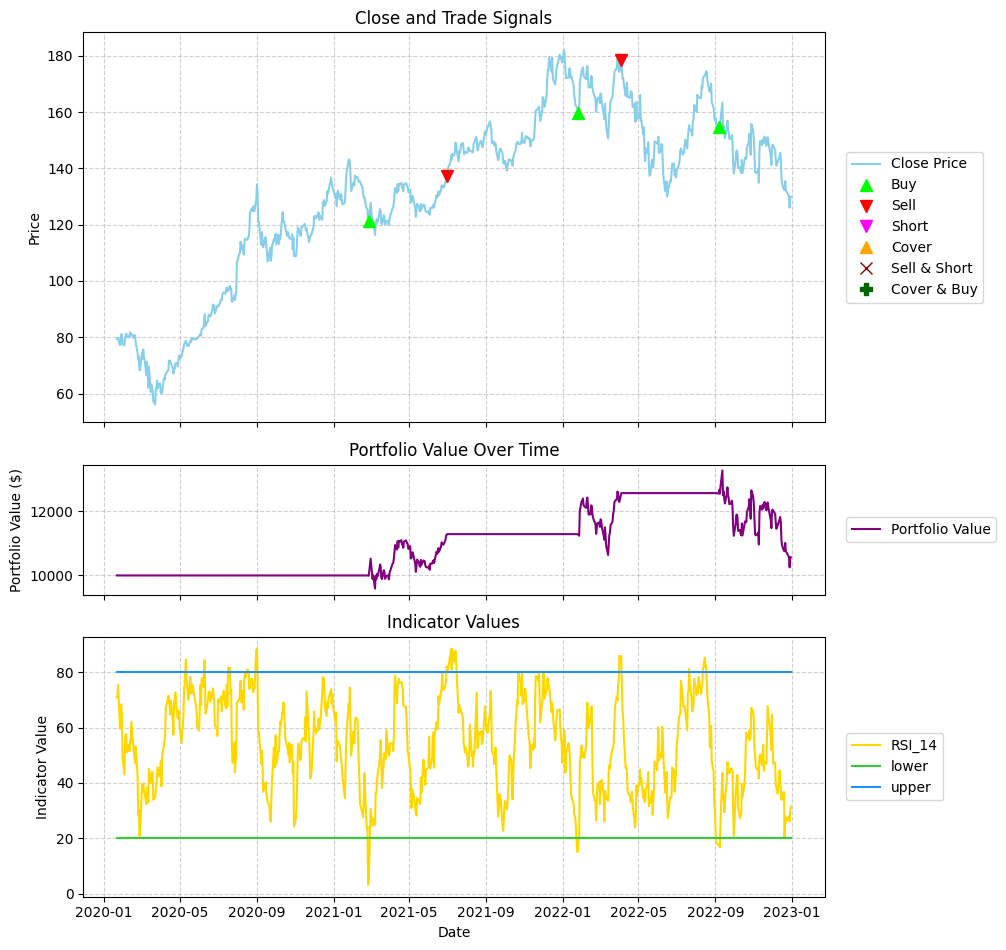

In [6]:
# --- Strategy Parameters ---
strategy_name = 'rsi'
specific_parameters = {
    'window': 14,
    'upper': 80,
    'lower': 20,
    'fig_control': 1,
}

parameters = {**global_parameters, **specific_parameters}

results, portfolio, fig = premade_backtest(data, strategy_name, parameters)

### Backtest with STOCH

Computing STOCH...


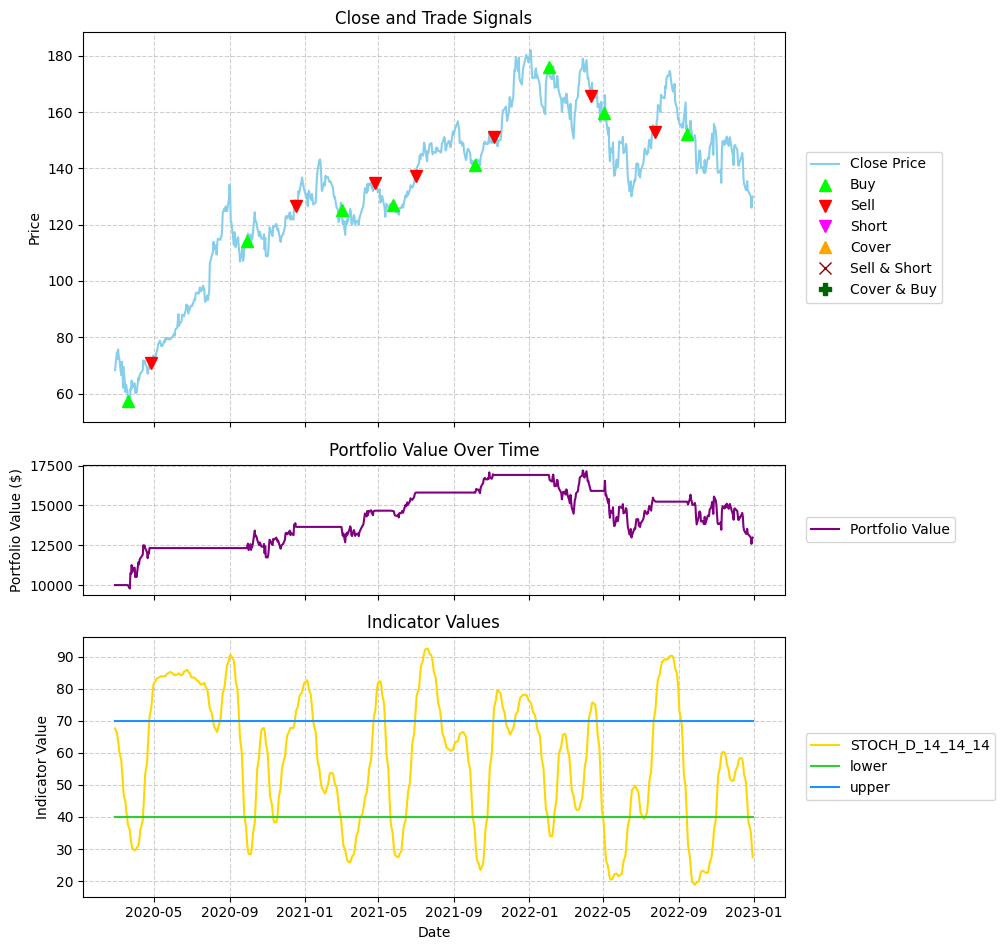

In [7]:
# --- Strategy Parameters ---
strategy_name = 'stoch'
specific_parameters = {
    'k_period': 14,
    'd_period': 14,
    'smooth_k': 14,
    'upper': 70,
    'lower': 40,
    'fig_control': 1,
}

parameters = {**global_parameters, **specific_parameters}

results, portfolio, fig = premade_backtest(data, strategy_name, parameters)